In [1]:
import torch

from IPython.display import Image

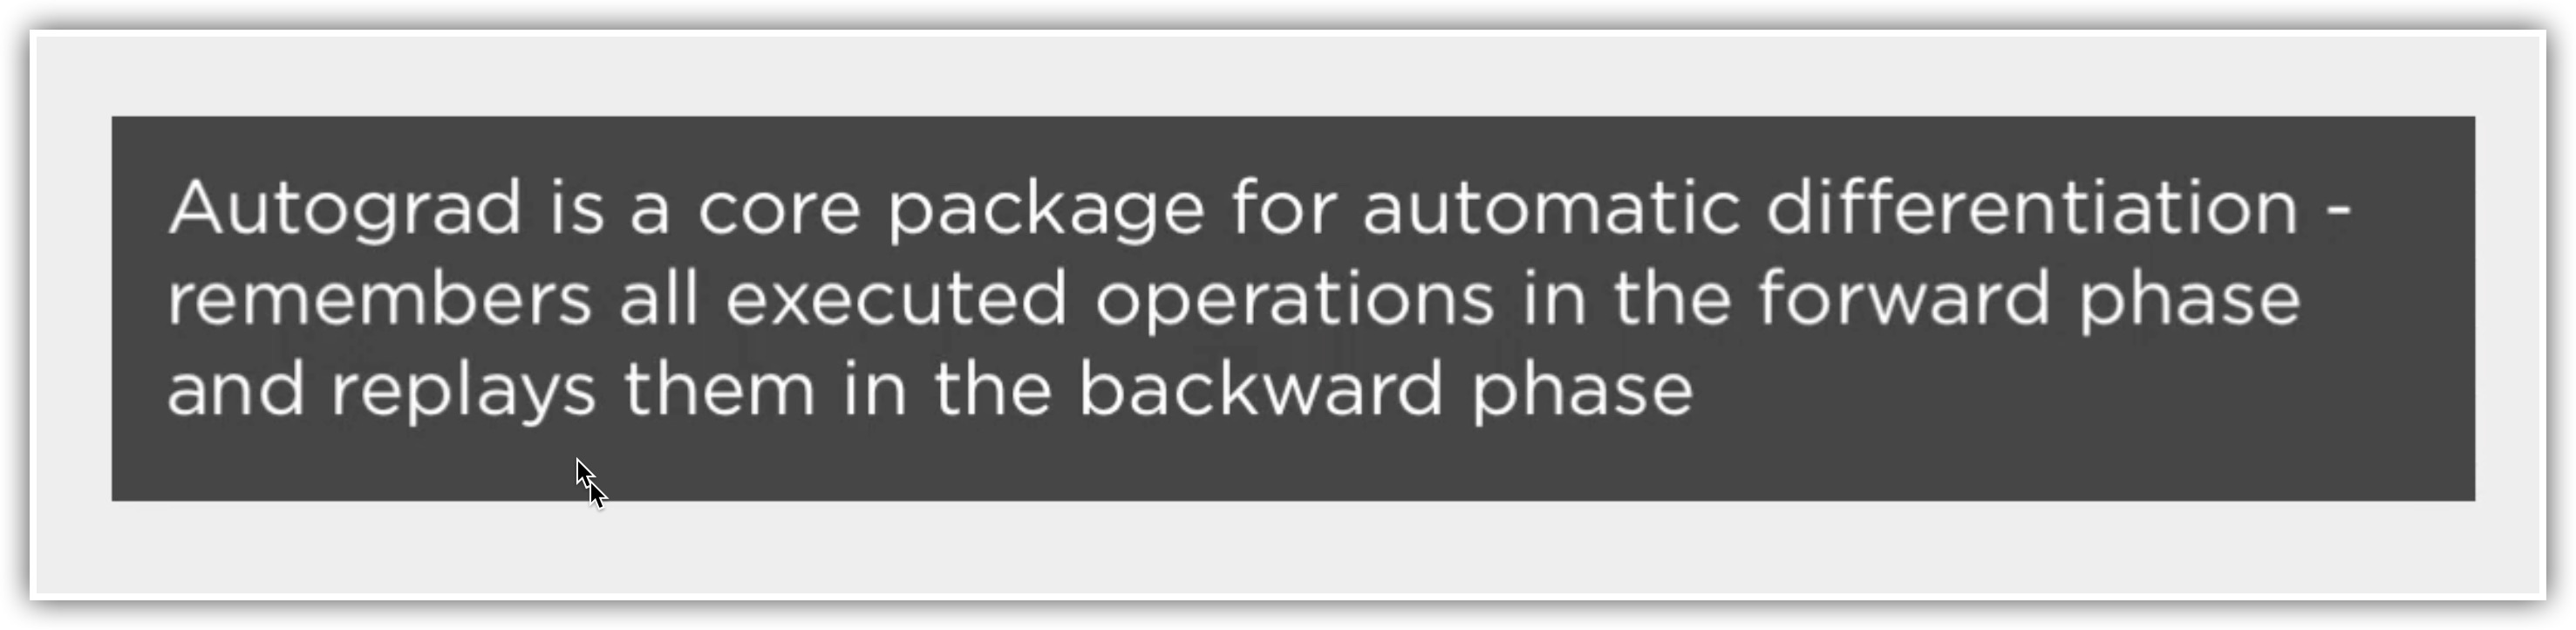

In [2]:
'''
This is the package which performs automatic differentiation to 
calculate gradients during the training phase of a neural network. 

In a neural network, you have tensors and you perform operations on them. 
Autograd remembers all of the executed operations that you've performed in 
the forward phase of your neural network prediction, 
it then replays these operations in the backward phase 
or the back propagation in order to calculate gradients. 
'''

Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-11_14-30-56.jpg')

In [2]:
tensor= torch.Tensor([[3,4],[7,5]])
tensor

tensor([[3., 4.],
        [7., 5.]])

In [4]:
'''
Ever tensor has a requires_grad property, 
which is initially set to false, which means computations which 
include the tensor will not be tracked by the Autograd package. 
'''
tensor.requires_grad

False

In [5]:
'''
If you want these computations to be tracked, you need to require gradients. 
You can call a requires_grad_ and this will set the requires grad property 
of your tensor to true. 

Autograd will now track computations on this answer so that it can 
be used to calculate gradients in the backward pass.
'''
tensor.requires_grad_()

tensor([[3., 4.],
        [7., 5.]], requires_grad=True)

In [6]:
tensor.requires_grad

True

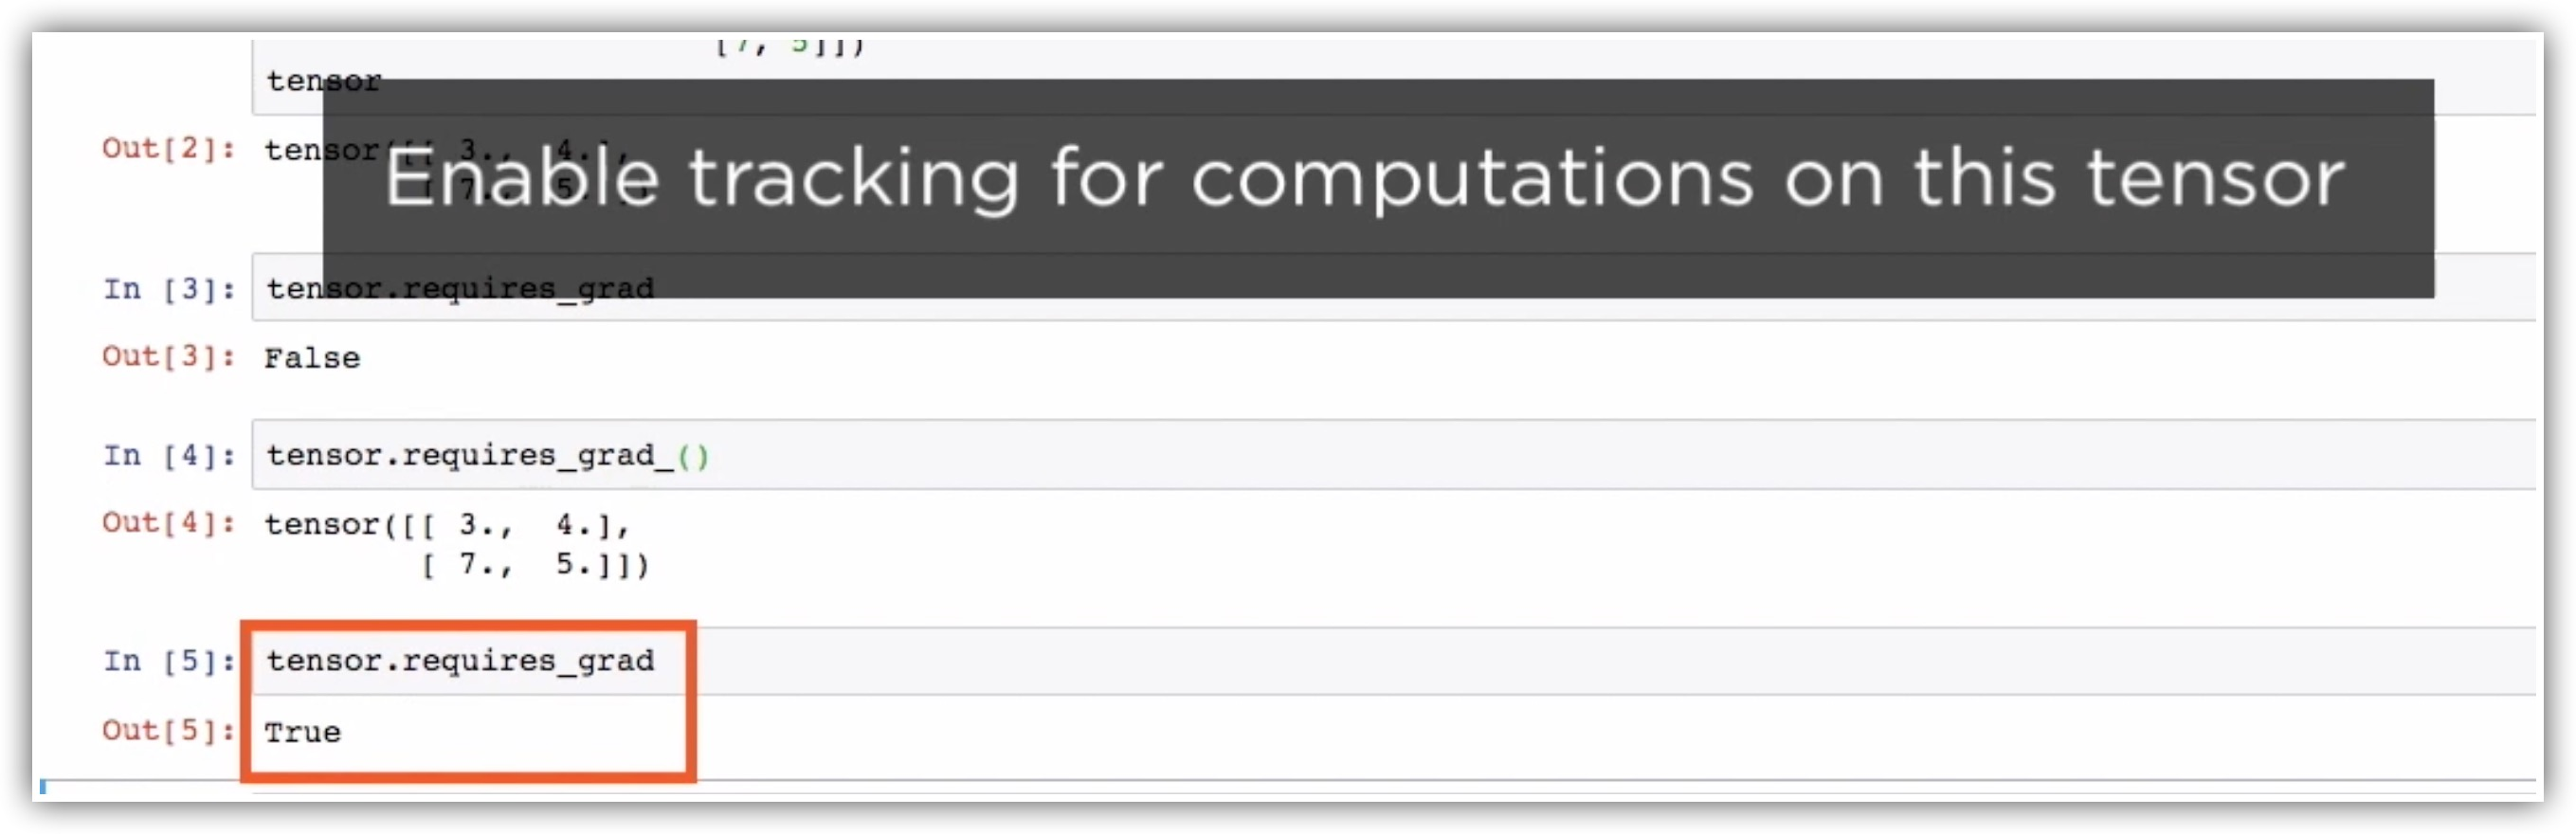

In [3]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-11_15-23-15.jpg')

In [7]:
'''
Every tensor that you create in PyTorch has a. grad attribute, 
which is another tensor which accumulates the gradient of the computations with 
respect to this tensor after the backward pass which has been used 
to calculate gradients. 

For example, if this tensor were to be fed into a neural network 
and we were to perform a backward pass from the loss function, 
the gradients of the loss with respect to this 
tensor would be stored in this. grad tensor.

 We haven't performed the backward pass on our computation graph yet, 
 which is why tensor. grad is set to none. 
'''
print(tensor.grad)

None


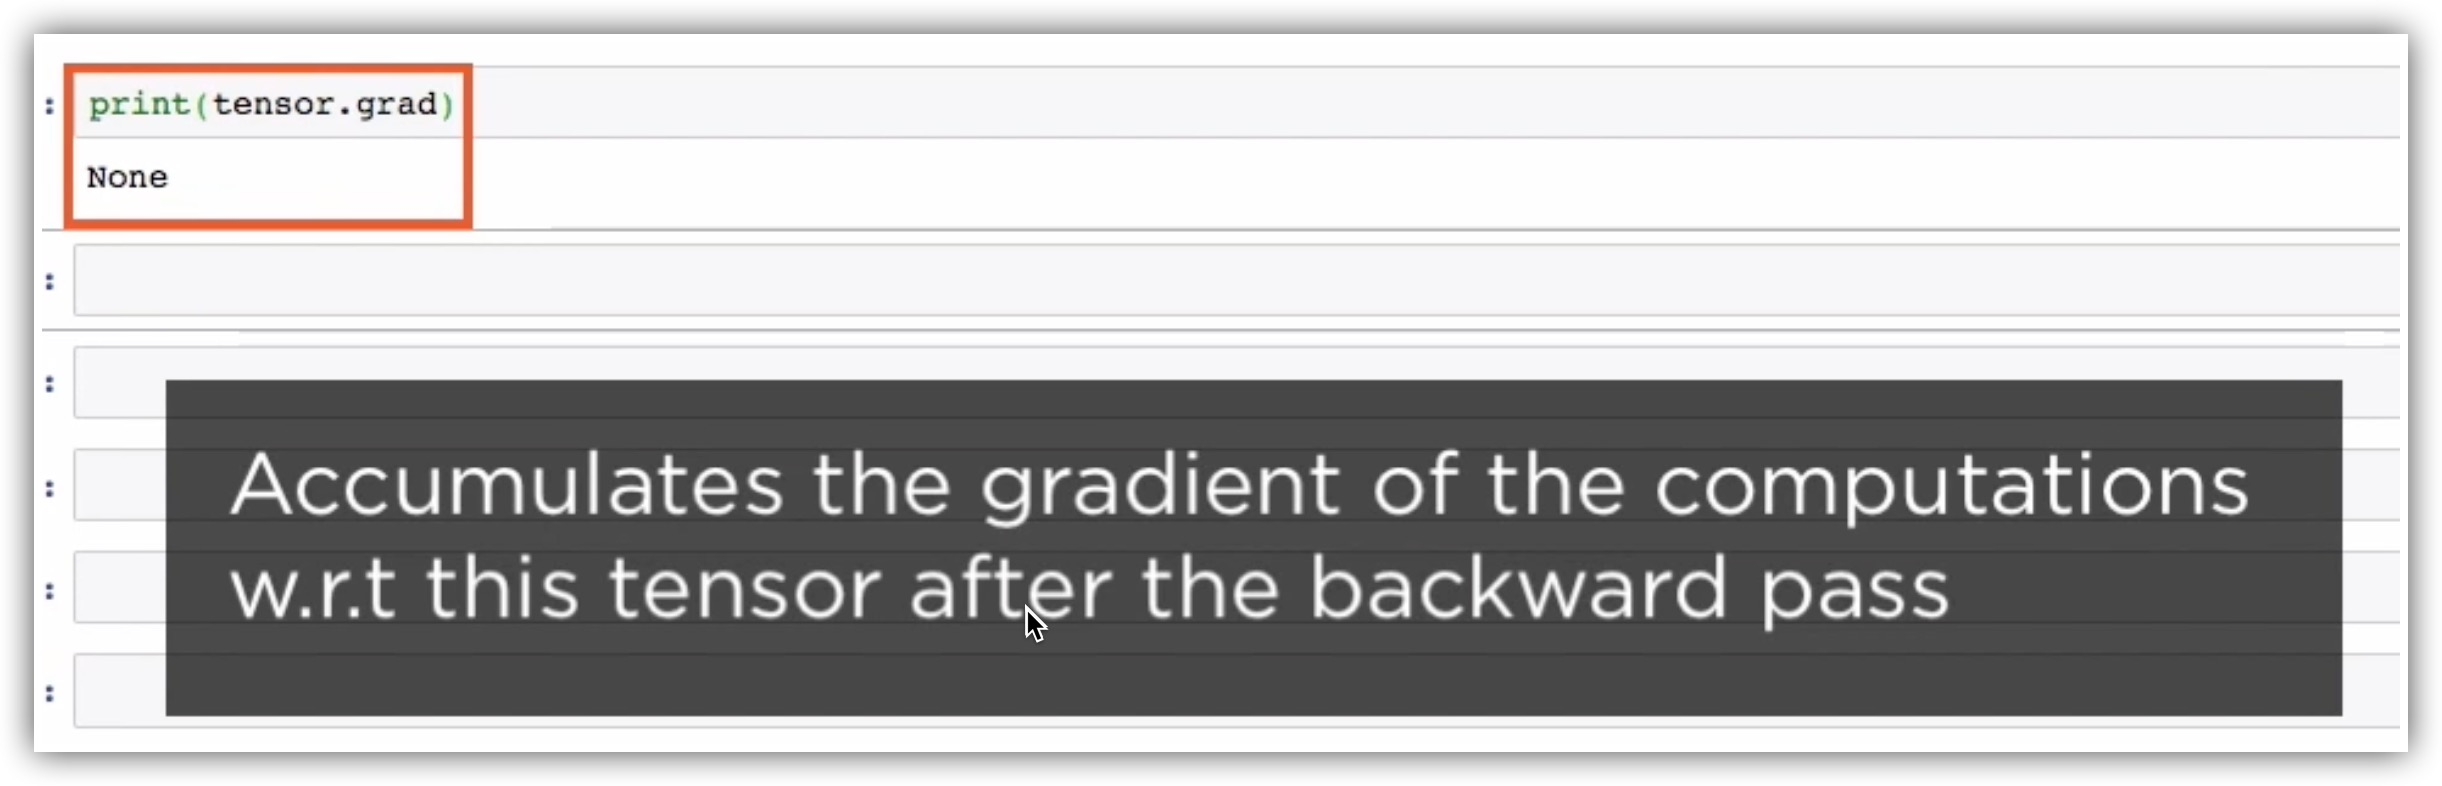

In [4]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-11_15-24-04.jpg')

In [8]:
'''
Because we haven't performed the backward pass, there is no gradient 
function associated with this tensor as well. 


'''
print(tensor.grad_fn)

None


In [9]:
'''
Now let's perform some kind of mathematical computation where we 
multiply two tensors. 
'''
out=tensor*tensor

In [11]:
'''
The out tensor also requires gradients because 
the input tensors to this computation also required gradients.
'''
out.requires_grad

True

In [14]:
'''
 If you check the out. grad property, you'll find that it still 
 doesn't have any gradients. 
'''
print(out.grad)

None


<ipython-input-14-b5f72fce5729>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:485.)
  print(out.grad)


In [13]:
'''
Now let's go ahead and check the gradient function. 
Because out is a tensor that represents the result of a 
computation which required gradients, it has a gradient function associated with 
it. 

When we perform a backward pass, this gradient function will be 
used to calculate gradients with the respect to out. 
'''
print(out.grad_fn)

In [15]:
'''
We multiply the tensors and calculate the mean and store it in the out tensor. 
The out tensor, once again, has another gradient function associated with it. 

The gradient function is different though because the computation is different. 

There are no gradients associated with the tensor yet nor without because 
none have been calculated.
'''
out=(tensor*tensor).mean()
print(out.grad_fn)

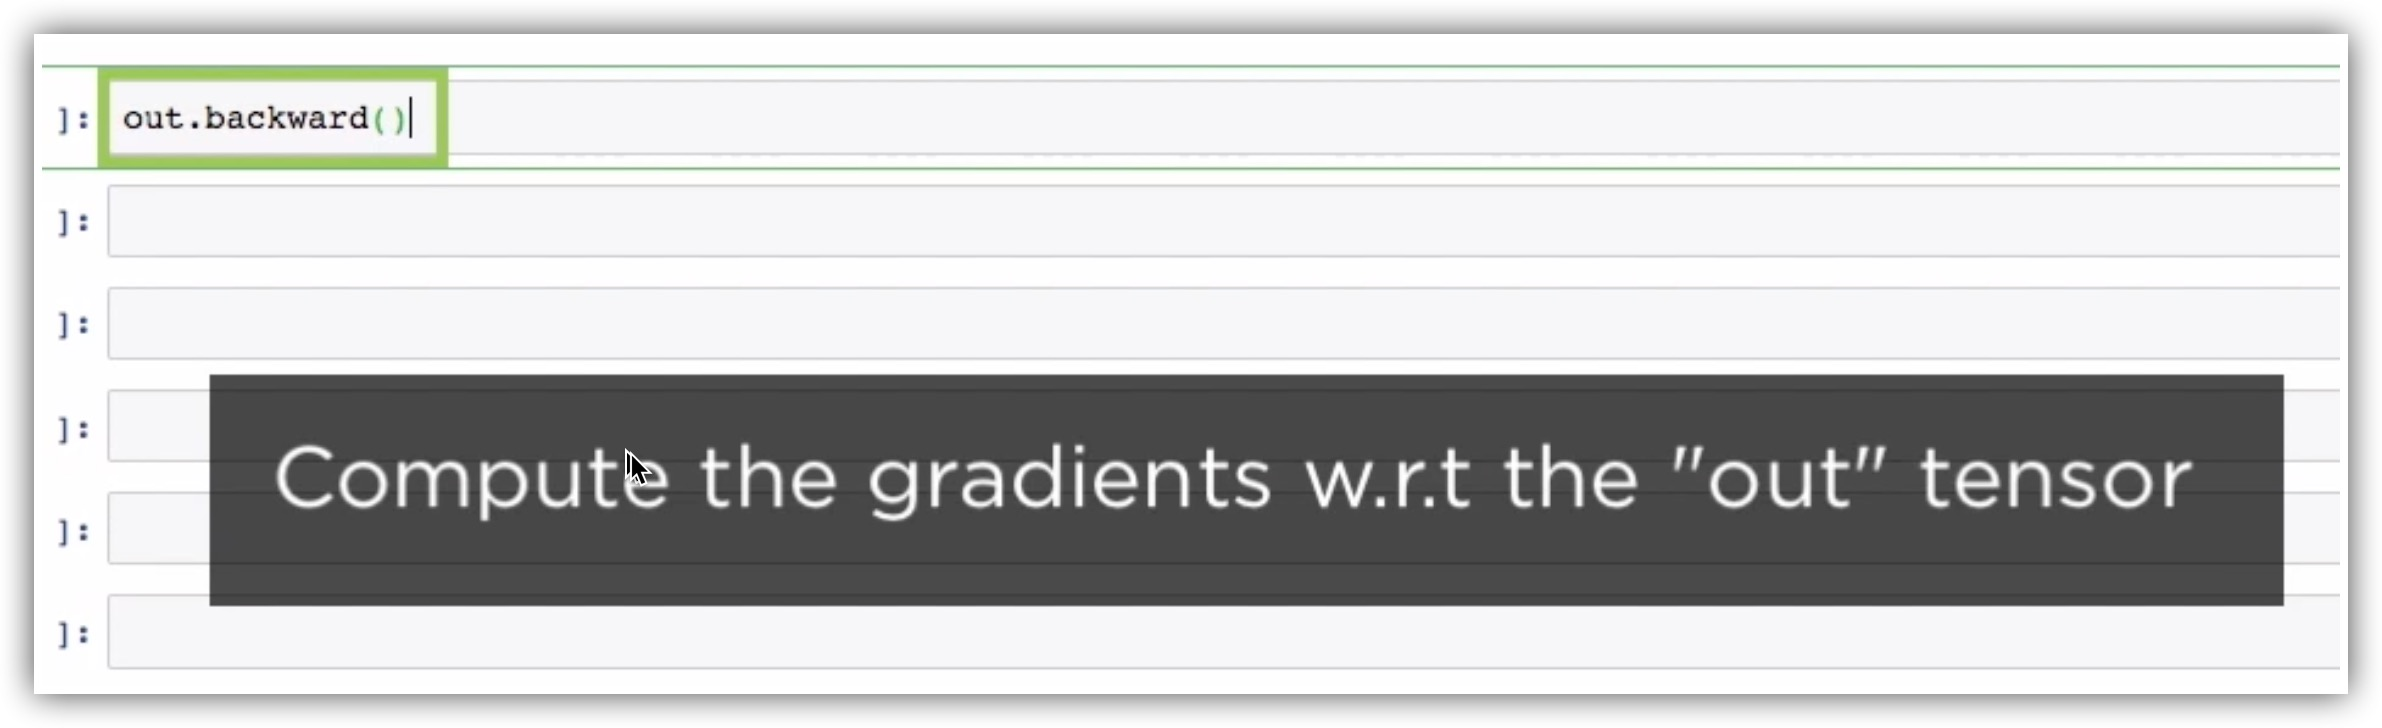

In [5]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-11_15-33-01.jpg')

In [16]:
'''
 Let's now call out. backward. This backward function in PyTorch is what 
 is used to perform the backward pass in a neural network where we 
 compute gradients and update the model parameters. 
 
 Out.backward will compute gradients with the respect to the out tensor. 
'''
out.backward()

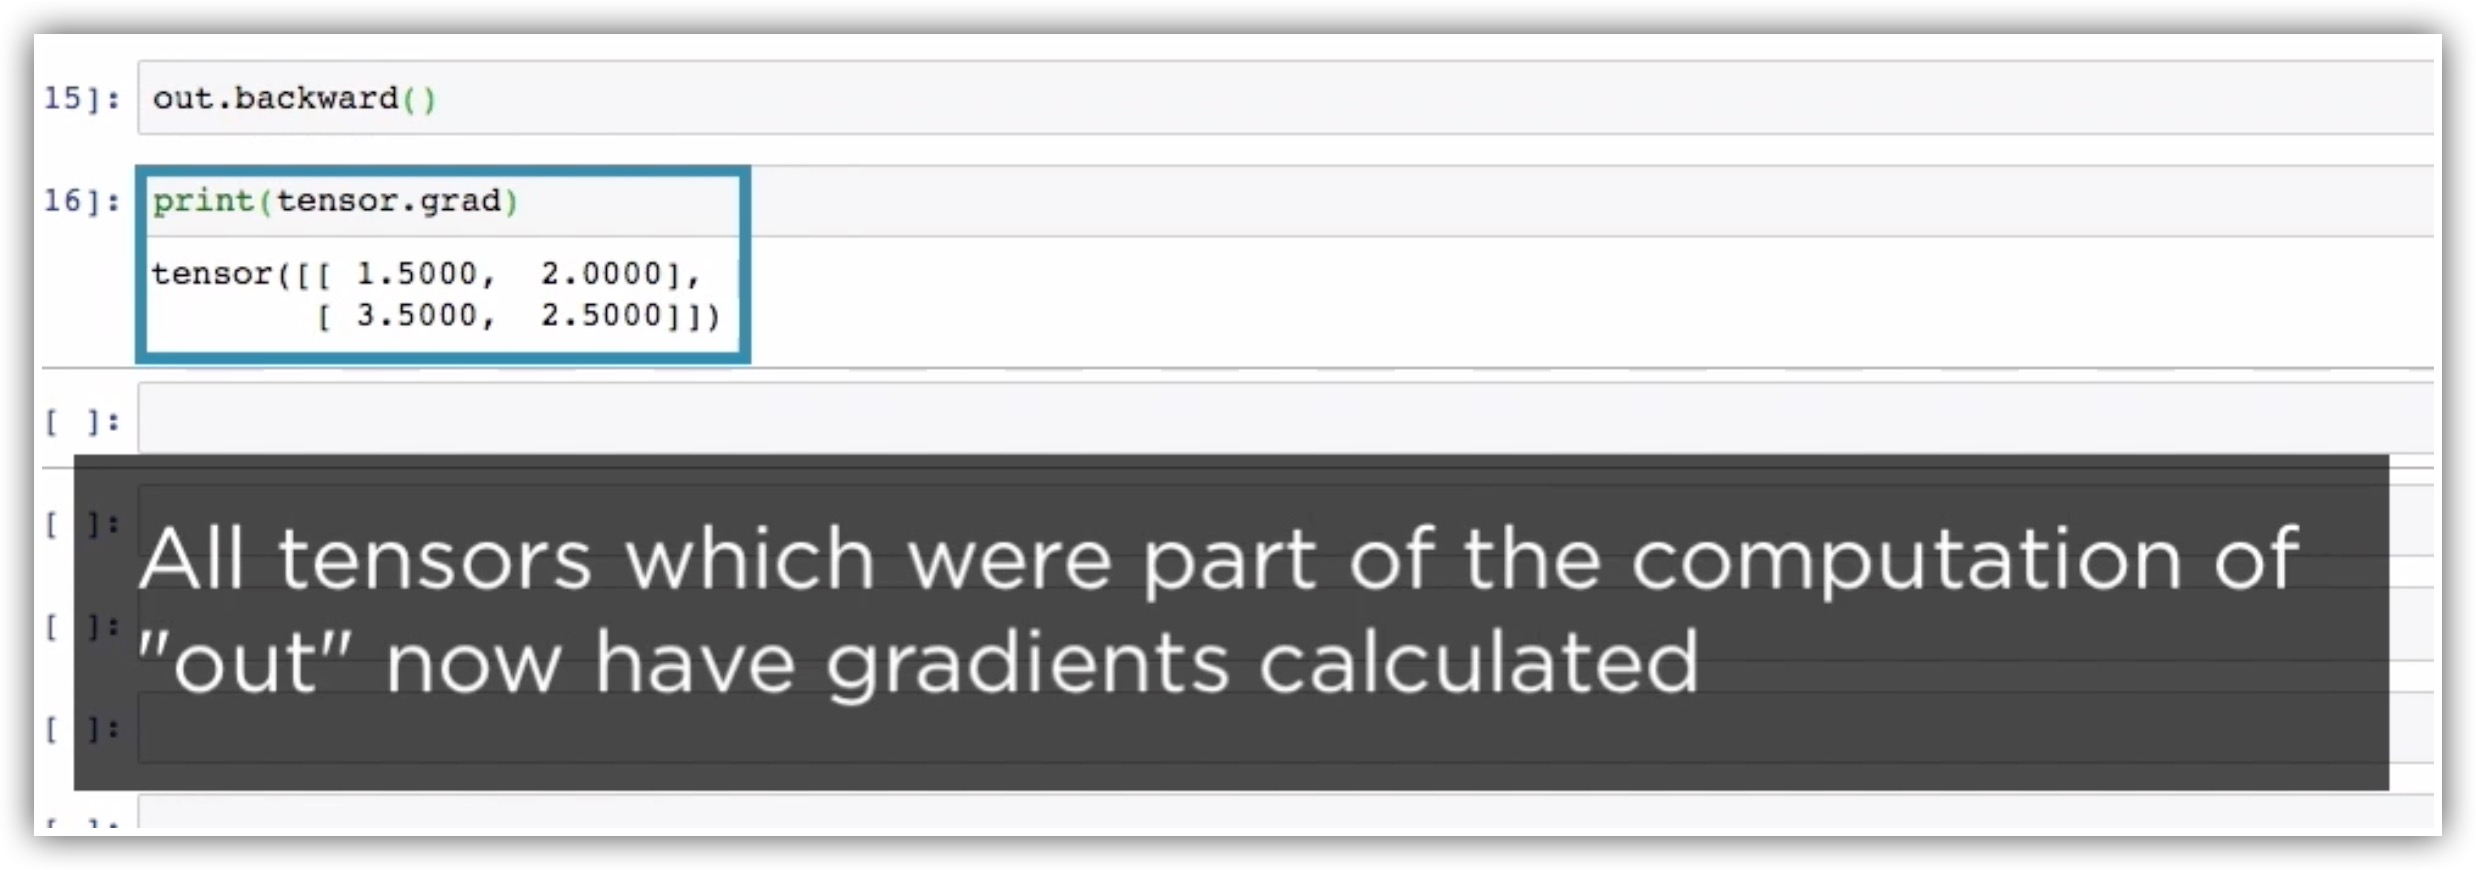

In [6]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-11_15-34-35.jpg')

In [18]:
'''
Now if you go back and print the gradients for each of our tensor, 
you'll see that it has some values. 

All tensors which were part of the computation of out now have 
gradients calculated.
'''
print(tensor.grad)

tensor([[1.5000, 2.0000],
        [3.5000, 2.5000]])


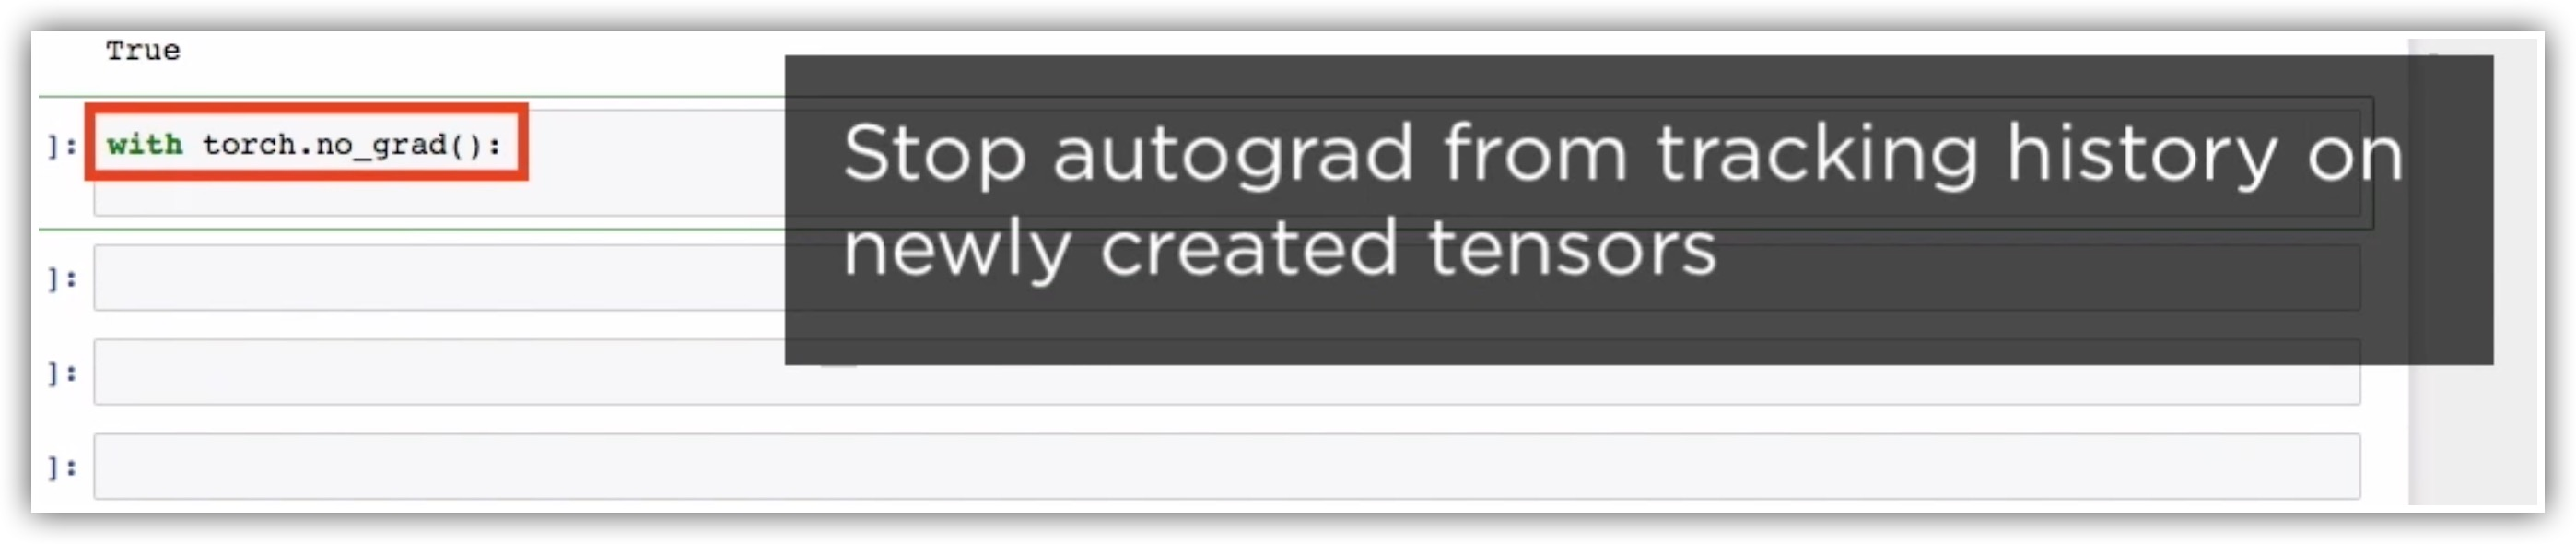

In [7]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/2023-03-11_15-36-29.jpg')

In [20]:
'''
Now let's say you want to create a new tensor, but you don't want 
Autograd to track history on these newly created tensors. 

You don't want requires_grad to be true for these newly created tensors. 
You can create a block of code using the with statement, with torch.no_grad. 

Any tensor that you create within this block will have the 
requires_grad property set to false and gradients will not be tracked 
on that tensor. 

Let's bring out all of this information on screen. 
The first thing that's printed to screen is the value of the new tensor 
that we got by multiplying tensor by tensor. 

The next two outputs are the requires_grad property for tensor 
and the new tensor that was calculated from the original tensor. 

You can see that the original tensor required the calculation of gradients, 
but because the new_tensor was created within this torch.no_grad block, 
it does not require the calculation of gradients. 

We require a gradient calculation when our neural network is in the training phase. 
We turn off calculating gradients when our neural network is running 
in the prediction phase.
'''
with torch.no_grad():
    new_tensor=tensor*tensor
    
    print('new_tensor=',new_tensor)
    
    print('requires_grad for tensor=',tensor.requires_grad)
    
    print('requires_grad for new_tensor=',new_tensor.requires_grad)
    
    

new_tensor= tensor([[ 9., 16.],
        [49., 25.]])
requires_grad for tensor= True
requires_grad for new_tensor= False
